# ECE 595 - Data Analysis, Design of Experiments, and Machine Learning

## Lecture 2 - Collecting and Plotting Data


*This notebook accompanies the ECE595 Data analytics course taught 
at Purdue in Fall 2022. These set of examples pertain to the materials of [Lecture 2](https://github.com/alam740/Data-Analytics-Course/blob/master/Lecture-PDFs/ECE%20595%20-%20Lecture%2002.pdf).*

*Written by Rohan Sheridan (sherida7@purdue.edu)*

*Please reach out to me with any quesitons and concerns regarding this notebook*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap 
from sklearn.utils import resample

In [ ]:
## These are paramaters to make a random data set
np.random.seed(3)
mult = 10
offset = -2
size = 10
## you can change these and change the data and see how it affects the stats

Data = np.random.rand(1,size)*mult - offset ## Create random data 
## Range of data: [0 , 1] * mult - offset

Data = np.round(Data,2) ## not necessary, rounding data for cleaner out

m = np.mean(Data)
sd = np.std(Data,ddof = 1) 
sdp = np.std(Data,ddof = 0) ## ddof = 0 specifies population STDev


print("Data: ",Data,
      "\n\nMean: ",np.round(m,2),
      "\n\nStandard Deviation: ",np.round(sd,2),
      "\n\nPopulation Standard Deviation: ",np.round(sdp,2))

Data:  [[ 7.51  9.08  4.91  7.11 10.93 10.96  3.26  4.07  2.51  6.41]] 

Mean:  6.68 

Standard Deviation:  3.02 

Population Standard Deviation:  2.87


# Bootstraping

In [ ]:
'''
Given a data sample from an underlying population or distribution
Bootstraping can give information about the distributions' statistics
'''

Data2 = [0.2, -0.1, 0.5, 0.3, -0.6]

'''
Here we set up empty lists so that we can create a collection of
synthetic samples

'''

sSamples = []
sMean = []
sStd = []
n = 100
'''
Next, we itterate through a for loop n times
Each loop we create a synthetic sample whose randomness is governed
by the random state: i

We can choose to use stratification or not
Using stratified sampling assumes there are subpopulations in
the larger population.
Sometimes this can help to achive more accurate statistics on
the entire poulation
'''

for i in range(n):
  rand = i
  temp = resample(Data2, random_state=i, 
                  n_samples=len(Data2),stratify=Data2)
  
  # Save the synthetic sample as a temporary variable
  # Then append the sample to our collection
  # Additionally, take the mean and std of the sample

  sSamples.append(temp)
  sMean.append(np.mean(temp))
  sStd.append(np.std(temp))

# Take the mean of the statstics we collected from
# the synthetic samples
# These values below can be used as our bootstrap mean and std

bMean = np.mean(sMean)
bStd = np.mean(sStd)

'''
Alternatively, we can resize our sample to be a column vector
or a row vector using numpy
Then, we can used scipy's bootstrap method to get a mean or std
'''
  
D2 = np.resize(np.array(Data2),(1,len(Data2)))

res1 = bootstrap(D2,np.mean,n_resamples=100,
                 confidence_level=0.9, random_state=0)

res2 = bootstrap(D2,np.std,n_resamples=100,
                 confidence_level=0.9,random_state=0)


In [ ]:
'''
Scipy gives us confidence intervals for which a given statistic lies 
within.
i.e. , res1 gives us an interval, with 90% confidence, for which 
a mean for our population lies based on the bootstrapped samples.
res2 returns the same but for the standard deviation

The mean and std generated from the synthetic samples created
using sklearn return a singular value. This value is consistent
with the invervals scipy returns, with the singular value lying
in the middle of the confidence interval for the corresponding statstic
'''

print("Bootsrapped Mean Confidence Interval: ",
      [res1.confidence_interval[0],res1.confidence_interval[1]])
print("\nBootstraped Mean: ",bMean)
print("\nBootsrapped STD Confidence Interval: ",
      [res2.confidence_interval[0],res2.confidence_interval[1]])
print("\nBootstraped STD: ",bStd)


Bootsrapped Mean Confidence Interval:  [-0.37357828693677353, 0.3]

Bootstraped Mean:  0.06

Bootsrapped STD Confidence Interval:  [0.17435595774162696, 0.5297528449385098]

Bootstraped STD:  0.3826225293941799


# Boxplot

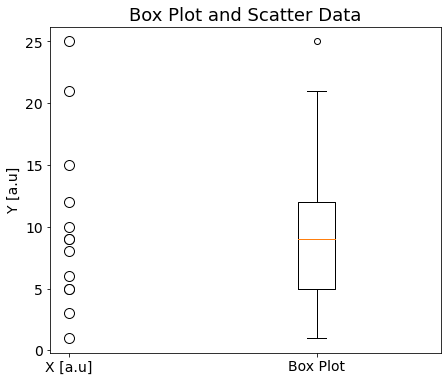

In [ ]:
## Here is a simple boxplot
## Plotted using the given data array

Data3 = np.array([1,5,6,5,10,12,9,9,8,21,3,15,25])

fig1, ax1 = plt.subplots()
fig1.set_size_inches((7,6))
ax1.set_title('Box Plot and Scatter Data',fontsize = 18)
ax1.boxplot(Data3)
ax1.scatter(0*Data3 ,Data3,
            c = "white", s = 100, edgecolors = 'black')

ax1.set_xticks([0,1])
ax1.set_xticklabels(["X [a.u]","Box Plot"],fontsize = 14)

ax1.tick_params(axis='y', which='major', labelsize=14)
ax1.set_ylabel("Y [a.u]", fontsize = 14)

plt.show()

# Stem and Leaf Plot

In [ ]:
# Below is a method for creating stem and leaf plots
# I am using the modulo function of python 
# There are also standalone libraries for stem plots

Data4 = np.array([44, 46, 47, 49, 63, 64, 66, 68, 68, 
                  72, 72, 75, 76, 81, 84, 88, 103])

print("Data: ",Data4,"\n")

stemLeaf = {}

for i in Data4:

  key = int(i/10)
  mod = i%10

  ## add a couple to explain python - rohan
  if key not in stemLeaf.keys():
    stemLeaf[key] = []

  stemLeaf[key].append(mod)

print('Stem | Leaf plot\n')
for k in stemLeaf:

  print(k,"|",stemLeaf[k],"\n")

Data:  [ 44  46  47  49  63  64  66  68  68  72  72  75  76  81  84  88 103] 

Stem | Leaf plot

4 | [4, 6, 7, 9] 

6 | [3, 4, 6, 8, 8] 

7 | [2, 2, 5, 6] 

8 | [1, 4, 8] 

10 | [3] 



# Numerical CDF and Intro to Hazard Rate

### Hazen Formula CDF Formula

$F_i = \frac{i - \alpha}{n - 2\alpha + 1} $

- $n = \# \space of \space data \space points $
- $i = index \space integer $
- $\alpha = CDF \space parameter$

$ $

From this we can get the Kaplan-Meier (proper) Formula

### Kaplan-Meier Formula

$F_i = 1-(\frac{n - \alpha +1}{n - 2\alpha + 1} )\Pi_{i=1}^f (\frac{n_{si} +1 - \alpha}{n_{si} + 2 -\alpha}) $

now with
- $n_{si} = \# \space samples \space after \space time \space t_i$

$ $

And with $\alpha = 0 $ the formula simplfies to:

$ $

$F_i = 1-\Pi_{i=1}^f (\frac{n_{si} +1}{n_{si} + 2 }) $

$ $

The form above will be use for the following example














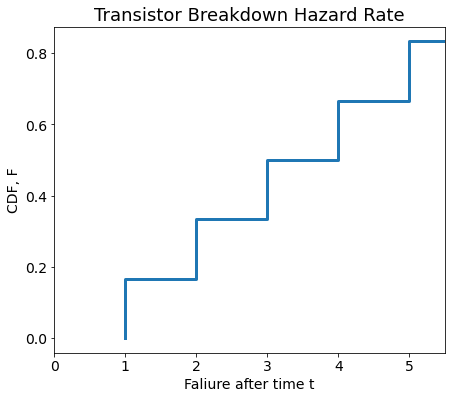

In [ ]:
Data5 = np.array([4,3,2,1,0]) # Number of samples surviving after time ti

F = [1]
i = 0
n = len(Data5)

ti = np.arange(0,n+1,1)
alpha = 0

for nsi in Data5:

  PIi = (nsi + 1 - alpha)/(nsi + 2 - alpha) # hazen formula
                            

  if len(F) == 1:
    F.append(PIi) ## At the first product component to the list
  else:
    F.append(PIi*F[len(F) - 1]) #Multiply PIi with previous entry in list
                                # This is done to achive the ith product component

F = 1 - (n - alpha + 1)/(n - 2*alpha +1)*np.array(F) # Kaplan-Meier CDF

fig, ax = plt.subplots()

fig.set_size_inches((7,6))

ax.step(ti+1,F,linewidth = 3)
ax.set_xlim([0,5.5])

ax.set_ylabel("CDF, F", fontsize = 14)
ax.set_xlabel("Faliure after time t", fontsize = 14)
ax.set_title("Transistor Breakdown Hazard Rate", fontsize = 18)

ax.tick_params(axis = 'both', which = 'major', labelsize=14)
plt.show()

